In [9]:
import numpy
import LibsControl
import matplotlib.pyplot as plt


def atractor_step(x, y, z, u, dt):

    ro      = 28.0
    sigma   = 10.0
    beta    = 8.0/3.0

    dx      = sigma*(y - x) + u
    dy      = x*(ro - z) - y
    dz      = x*y - beta*z

    x_new   = x     + dx*dt
    y_new   = y     + dy*dt
    z_new   = z     + dz*dt

    return x_new, y_new, z_new



x           = 1.0
y           = 1.0
z           = 1.0
u           = 0.0

dt          = 1.0/1000.0


u_batch     = []
x_batch     = []
y_batch     = []
z_batch     = []


steps = 10000
for i in range(steps):

    u = 0.0

    x_new, y_new, z_new = atractor_step(x, y, z, u, dt)

    x       = x_new
    y       = y_new
    z       = z_new

    u_batch.append(u)

    x_batch.append(x_new)
    y_batch.append(y_new)
    z_batch.append(z_new)


u_batch     = numpy.expand_dims(numpy.array(u_batch), 1)
x_batch     = numpy.expand_dims(numpy.array(x_batch), 1)
y_batch     = numpy.expand_dims(numpy.array(y_batch), 1)
z_batch     = numpy.expand_dims(numpy.array(z_batch), 1)


x_batch = numpy.hstack([x_batch, y_batch, z_batch])

print(">>>> ", u_batch.shape, x_batch.shape)


>>>>  (10000, 1) (10000, 3)


In [10]:
#find models
models, loss = LibsControl.identification(u_batch, x_batch, dt, 50, [LibsControl.polynomial_augmentation])

model ID			density[%]			loss
0 				 1.7 				 21813.18926631248
1 				 3.3 				 24004.05284454578
2 				 5.0 				 21586.623617846068
3 				 6.7 				 23345.5603499202
4 				 8.3 				 22017.056995762963
5 				 10.0 				 20119.682041929766
6 				 11.7 				 5504.264297704134
7 				 11.7 				 5029.920554083298
8 				 11.7 				 1376.0660988077516
9 				 11.7 				 1257.4801603212725
10 				 11.7 				 344.01653689279874
11 				 11.7 				 314.3700509805435
12 				 11.7 				 86.00414031863635
13 				 11.7 				 78.5925181952548
14 				 11.7 				 21.5010381273834
15 				 11.7 				 19.648132273879128
16 				 11.7 				 5.375261055713664
17 				 11.7 				 4.912034431008146
18 				 11.7 				 1.3438160258680079
19 				 11.7 				 1.2280092890269056
20 				 11.7 				 0.33595438744248474
21 				 11.7 				 0.3070026628998464
22 				 11.7 				 0.08398878735404793
23 				 11.7 				 0.07675083605220674
24 				 11.7 				 0.02099729209090845
25 				 11.7 				 0.01918779418235776
26 				 11.7 				 0.0052493706546

"\nplt.cla()\nplt.clf()\nplt.imshow(models[25].T , cmap = 'magma' )\nplt.colorbar()\n"

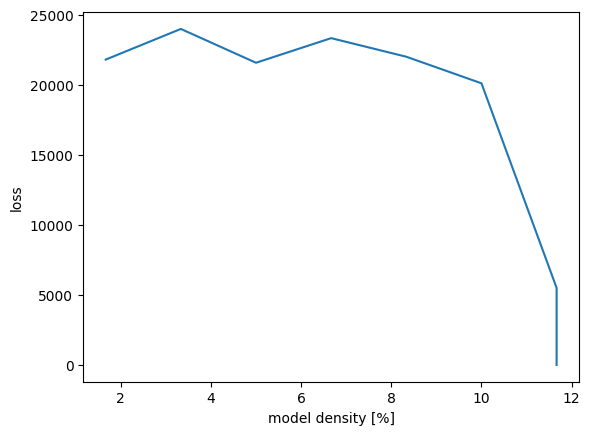

In [11]:
#print and plot results

print("model ID\t\t\tdensity[%]\t\t\tloss")

density = []
for i in range(models.shape[0]):
    density_ = 100*(numpy.abs(models[i]) > 10**-5).sum()/(models.shape[1]*models.shape[2])
    density.append(density_)
    print(i, "\t\t\t\t", round(density_, 1), "\t\t\t\t", loss[i])


plt.cla()
plt.clf()
plt.xlabel("model density [%]")
plt.ylabel("loss")
plt.plot(density, loss)

print(models[-1])

'''
plt.cla()
plt.clf()
plt.imshow(models[25].T , cmap = 'magma' )
plt.colorbar()
'''



In [12]:
#split model to system dynamics matrices a, b

model = models[-1]

ab      = model.T
order   = x_batch.shape[1]
a = ab[:, 0:order]
b = ab[:, order:]


#print("ground truth = ")
#print(numpy.round(ds.mat_a, 3))
#print(numpy.round(ds.mat_b, 3))

print("\n\n\n")

print("model = ")
print(numpy.round(a, 5))
print(numpy.round(b, 5))





model = 
[[-10.       10.        0.     ]
 [ 28.       -1.        0.     ]
 [  0.        0.       -2.66667]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
